<a href="https://colab.research.google.com/github/ashwinishaktive1/Hackathons/blob/main/Shopify_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

### Import Data

In [87]:
q1_data = pd.read_csv("/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv", header = 0)
q1_data.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [88]:
q1_data.shape

(5000, 7)

In [89]:
q1_og = q1_data

While observing through the data manually, the first major buy seemed to be of Dollar 704000, but for a count of 200 items which is approximately ~350 dollars per item seemingly close to cost of many other products. Then comes a single product being sold for ~25000 dollars. This helped me understand that the Average order value has been greatly skewed by such outliers. So the first step would be look at such outliers, and their counts. I will be calculating per item value for each order and plotting a boxplot (or scatterplot) to get a visual representation of the same:

In [90]:
q1_data['per_item_value'] = q1_data['order_amount'] / q1_data['total_items']
q1_data['per_item_value']

0       112.0
1        90.0
2       144.0
3       156.0
4       156.0
        ...  
4995    165.0
4996    117.0
4997    117.0
4998    177.0
4999    144.0
Name: per_item_value, Length: 5000, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


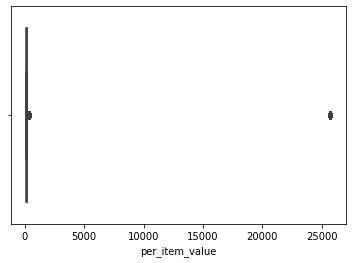

In [91]:
sns.boxplot(q1_data['per_item_value'])

We can observe a major outlier at 25000 mark. Let's remove these outliers and look into them seperately. 

In [92]:
print(np.where(q1_data['per_item_value']>1000))

(array([ 160,  490,  493,  511,  617,  691, 1056, 1193, 1204, 1259, 1384,
       1419, 1452, 1529, 2270, 2452, 2492, 2495, 2512, 2548, 2564, 2690,
       2773, 2818, 2821, 2906, 2922, 3085, 3101, 3151, 3167, 3403, 3440,
       3705, 3724, 3780, 4040, 4079, 4192, 4311, 4412, 4420, 4505, 4584,
       4715, 4918]),)


In [93]:
z = np.abs(stats.zscore(q1_data['per_item_value']))
print(z)

[0.11292976 0.1219398  0.09982424 ... 0.11088202 0.08630918 0.09982424]


In [94]:
non_outliers = (z < 3)
non_outliers

array([ True,  True,  True, ...,  True,  True,  True])

In [95]:
q1_data = q1_data[non_outliers]
q1_data.shape

(4954, 8)

We may now look at the average order values, to re-confirm the given metric:

In [96]:
updated_aov = sum(q1_data['order_amount']) / sum(q1_data['total_items'])
print("The updated AOV after removal of outliers is:", updated_aov)

The updated AOV after removal of outliers is: 307.01149425287355


This seems to be much better than the actual calculation. We have dropped 46 orders as they were largely skewing the calculation. We may manually look into those for cause of errors or product deals!

Though, now let's look at another metric to look into sale details, that is Revenue Per Visitor (RPV)! Revenue per visitor (RPV) is a measurement of the amount of money generated each time a customer visits your website. 

RPV = Total Revenue / Total Unique Visitors

In [97]:
RPV = sum(q1_og['order_amount']) / pd.unique(q1_og['user_id']).size
print("The RPV on the original dataset is:", RPV)

The RPV on the original dataset is: 52244.651162790695


In [98]:
RPV_wo_outliers = sum(q1_data['order_amount']) / pd.unique(q1_data['user_id']).size
print("The RPV on the dataset without outliers is:", RPV_wo_outliers)

The RPV on the dataset without outliers is: 44723.72093023256


This looks like a much more noisy metric, since it's getting affected by large buys such as the 704000 order. To resolve this, we'll further need to remove large order value outliers. 

# Question 2:

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total?

Ans:  *54 orders were shipped by Speedy Express.*

SELECT Shippers.ShipperName, COUNT(Orders.OrderID) AS countOfShipments FROM Orders 

LEFT JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID

WHERE ShipperName = "Speedy Express"

2. What is the last name of the employee with the most orders?

Ans: *LastName Peacock with	40 orders*

SELECT Employees.LastName, COUNT(Orders.OrderID) AS employeeWithMaxOrders FROM Orders 

LEFT JOIN Employees ON Employees.EmployeeID = Orders.EmployeeID

GROUP BY LastName

ORDER BY employeeWithMaxOrders desc

LIMIT 1

3. What product was ordered the most by customers in Germany?

Ans: 

SELECT Customers.Country, ProductName FROM Products

LEFT JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID 

LEFT JOIN Orders ON OrderDetails.OrderID = Orders.OrderID

LEFT JOIN Customers ON Orders.CustomerID = Customers.CustomerID

WHERE Country = 'Germany'

GROUP BY OrderDetails.ProductID

ORDER BY COUNT(*) DESC

LIMIT 1
